<a href="https://colab.research.google.com/github/DSNortsev/CSE-694-Case-Studies-in-Deep-Learning/blob/master/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("Research_data_train.csv") 
# Display number of rows set to None to display all rows
pd.set_option('display.max_rows', 10)

df1
print(f'Group by CaseId:\n {df1.groupby("CaseID").size()}\n')
print(f'The minimum number of measurements per one case: {df1.groupby("CaseID").size().min()}')
print(f'The maximum number of measurements per one case: {df1.groupby("CaseID").size().max()}')

df_output = df1.groupby("CaseID").agg({'output':['min', 'max', 'mean']})

print(f"Find minimum value of mean in output: {df_output['output']['mean'].min()}")
print(f"Find maximum value of mean in output: {df_output['output']['mean'].max()}")
print(f"Total number positive and negative cases:\n {df1.groupby(['CaseID', 'output']).size().groupby('output').size()}")

# pd.set_option('display.max_rows', None)
print(df1.isnull().sum())
# Find all rows with miissing values
df1[pd.isnull(df1).any(axis=1)]


Group by CaseId:
 CaseID
4690     130
4694     131
4696     131
4700     126
4704     112
        ... 
29823    126
29970    104
30000    132
30043     30
30056     86
Length: 301, dtype: int64

The minimum number of measurements per one case: 30
The maximum number of measurements per one case: 132
Find minimum value of mean in output: 0.0
Find maximum value of mean in output: 1.0
Total number positive and negative cases:
 output
0.0    265
1.0     36
dtype: int64
row_ID      0
CaseID      0
Weeks       0
Factor1     0
Factor2     0
           ..
Factor70    1
Factor71    1
Factor72    1
Factor73    1
output      1
Length: 77, dtype: int64


,row_ID,CaseID,Weeks,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31,Factor32,Factor33,Factor34,Factor35,Factor36,Factor37,Factor38,Factor39,Factor40,Factor41,Factor42,Factor43,Factor44,Factor45,Factor46,Factor47,Factor48,Factor49,Factor50,Factor51,Factor52,Factor53,Factor54,Factor55,Factor56,Factor57,Factor58,Factor59,Factor60,Factor61,Factor62,Factor63,Factor64,Factor65,Factor66,Factor67,Factor68,Factor69,Factor70,Factor71,Factor72,Factor73,output
33996,34765,30043,24.242424,0.0,0.0,0.0,12.0,0.0,0.0,9.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.428571,5.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1['Weeks']

0         3.030303
1         3.030303
2         3.030303
3         3.030303
4         6.060606
           ...    
33992    21.212121
33993    21.212121
33994    21.212121
33995    24.242424
33996    24.242424
Name: Weeks, Length: 33997, dtype: float64

In [4]:
# df1.info()
print("Number of records (patients): ", df1.shape[0])
print("Number of columns (features): ", df1.shape[1])

Number of records (patients):  33997
Number of columns (features):  77


In [5]:
print('Unique Values in Weeks:', *list(df1.Weeks.unique()), sep='\n')

Unique Values in Weeks:
3.0303030303030303
6.0606060606060606
9.090909090909092
12.12121212121212
15.151515151515152
18.181818181818183
21.21212121212121
24.24242424242424
27.27272727272727
30.303030303030305
33.33333333333333
36.36363636363637
39.39393939393939
42.42424242424242
45.45454545454545
48.48484848484848
51.51515151515152
54.54545454545454
57.57575757575758
60.60606060606061
63.63636363636363
66.66666666666666
69.6969696969697
72.72727272727273
75.75757575757575
78.78787878787878
81.81818181818183
84.84848484848484
87.87878787878788
90.9090909090909
93.93939393939394
96.96969696969695
100.0


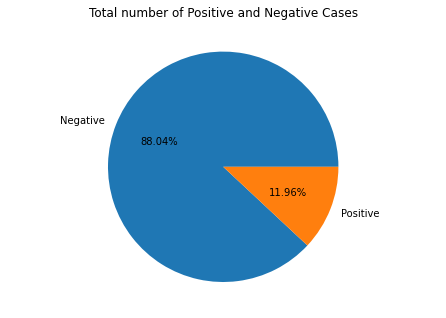

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# # import plotly.plotly as py
# #plotly.offline doesn't push your charts to the clouds
# import plotly.offline as pyo
# import plotly.graph_objs as go
# pyo.offline.init_notebook_mode()

labels = df1.groupby("CaseID").agg({'output':'max'}).value_counts().index
values = df1.groupby("CaseID").agg({'output':'max'}).value_counts().values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(values, labels = ['Negative', 'Positive'], autopct='%1.2f%%')
plt.title('Total number of Positive and Negative Cases')
plt.show()


In [8]:
df2 = df1.dropna()
print(df1)
print(df2)

       row_ID  CaseID      Weeks  ...  Factor72  Factor73  output
0           0   29764   3.030303  ...       0.0       0.0     0.0
1           1   29764   3.030303  ...       0.0       0.0     0.0
2           2   29764   3.030303  ...       0.0       0.0     0.0
3           3   29764   3.030303  ...       0.0       0.0     0.0
4           4   29764   6.060606  ...       0.0       0.0     0.0
...       ...     ...        ...  ...       ...       ...     ...
33992   34761   30043  21.212121  ...       0.0       0.0     0.0
33993   34762   30043  21.212121  ...       0.0       0.0     0.0
33994   34763   30043  21.212121  ...       0.0       0.0     0.0
33995   34764   30043  24.242424  ...       0.0       0.0     0.0
33996   34765   30043  24.242424  ...       NaN       NaN     NaN

[33997 rows x 77 columns]
       row_ID  CaseID      Weeks  ...  Factor72  Factor73  output
0           0   29764   3.030303  ...       0.0       0.0     0.0
1           1   29764   3.030303  ...       0.0  

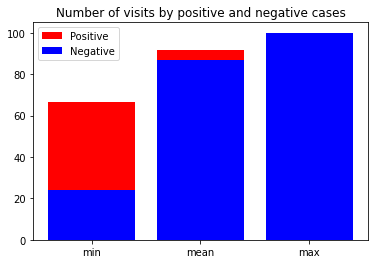

In [100]:
df2 = df1.dropna()
data = df2.groupby(['CaseID'], sort=False)[['Weeks', 'output']].max().reset_index()


data[data.output == 1.00][['Weeks', 'output']]
positive_mean = data[data.output == 1.0]['Weeks'].mean()
negative_mean = data[data.output == 0.0]['Weeks'].mean()
positive_min = data[data.output == 1.0]['Weeks'].min()
negative_min = data[data.output == 0.0]['Weeks'].min()
positive_max = data[data.output == 1.0]['Weeks'].max()
negative_max = data[data.output == 0.0]['Weeks'].max()

data1 = [positive_min, positive_mean, positive_max]
data2 = [negative_min, negative_mean, negative_max]

# print(negative_min, positive_min)

# output_positive = data[data.output == 1.0]['output'].values
# weeks_negative = data[data.output == 0.0]['Weeks'].mean()
# output_negative = data[data.output == 0.0]['output'].values


# # Figure Size 
# fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
colors = {'Positive':'red', 'Negative':'blue'}
# print(colors.keys())
plt.bar(['min', 'mean', 'max' ], data1, color=colors['Positive']) 
plt.bar(['min', 'mean', 'max' ], data2, color=colors['Negative']) 

plt.title('Number of visits by positive and negative cases')
# Show Plot 
plt.legend(colors.keys())
plt.show() 

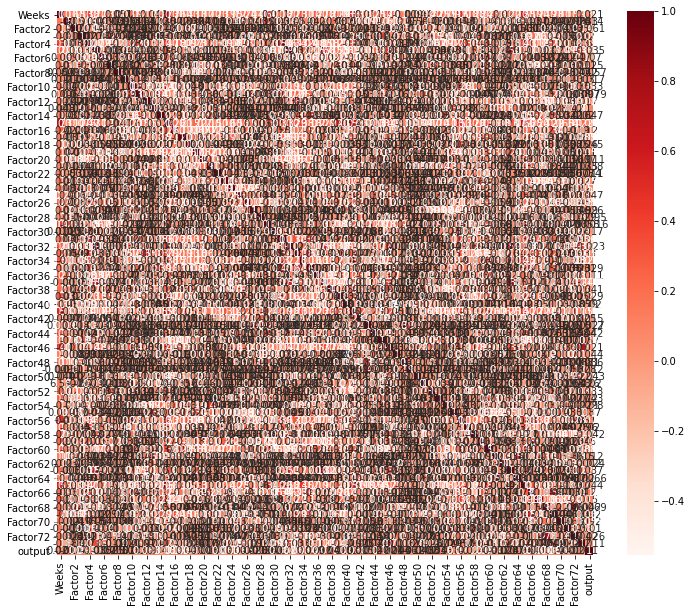

In [117]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

df2 = df1.dropna().iloc[:, 2:]
X = df2.iloc[:, 2:-1]
Y = df2.output

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [124]:
#Correlation with output variable
cor_target = abs(cor['output'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Weeks       0.020857
Factor1     0.013590
Factor2     0.060888
Factor3     0.092232
Factor4     0.095713
              ...   
Factor69    0.061424
Factor70    0.055446
Factor72    0.026368
Factor73    0.011480
output      1.000000
Name: output, Length: 68, dtype: float64

In [187]:
df3 = df2.iloc[:, 2:-1]

In [190]:



Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df1
print(df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))

row_ID      17444.000000
CaseID       3590.000000
Weeks          42.424242
Factor1         0.000000
Factor2         0.000000
                ...     
Factor70        0.000000
Factor71        0.000000
Factor72        0.000000
Factor73       33.333333
output          0.000000
Length: 77, dtype: float64
       row_ID  CaseID  Weeks  Factor1  ...  Factor71  Factor72  Factor73  output
0       False   False  False    False  ...     False     False     False   False
1       False   False  False    False  ...     False     False     False   False
2       False   False  False    False  ...     False     False     False   False
3       False   False  False    False  ...     False     False     False   False
4       False   False  False    False  ...     False     False     False   False
...       ...     ...    ...      ...  ...       ...       ...       ...     ...
33992   False   False  False    False  ...     False     False     False   False
33993   False   False  False    False  ...     Fal

TypeError: ignored

In [189]:
df2.describe()

,row_ID,CaseID,Weeks,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31,Factor32,Factor33,Factor34,Factor35,Factor36,Factor37,Factor38,Factor39,Factor40,Factor41,Factor42,Factor43,Factor44,Factor45,Factor46,Factor47,Factor48,Factor49,Factor50,Factor51,Factor52,Factor53,Factor54,Factor55,Factor56,Factor57,Factor58,Factor59,Factor60,Factor61,Factor62,Factor63,Factor64,Factor65,Factor66,Factor67,Factor68,Factor69,Factor70,Factor71,Factor72,Factor73,output
count,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000
mean,17406.845952,9719.616926,46.241091,2.118331,1.814276,1.328170,7.126015,7.318508,2.149019,1.686747,0.278184,0.116513,2.630732,3.922119,4.301486,3.816625,0.866278,19.722909,5.583464,1.614706,1.358742,8.604689,2.028986,5.396223,0.918222,2.083578,2.553588,5.193570,7.883280,15.369455,1.167588,6.651099,55.538887,2.738978,8.059772,6.194193,6.848174,2.226733,6.853114,4.398312,3.227279,3.353924,13.264796,19.573871,4.524902,7.977409,3.090943,2.171349,11.584598,24.235204,1.467680,2.721889,40.989785,1.843445,2.896054,7.923789,1.608334,7.006707,5.560981,2.995828,5.851630,5.413578,2.212417,4.650547,7.065537,6.644899,2.259089,14.913876,2.574454,4.212064,4.408362,5.965503,1.175161,2.866246,4.696631,10.266894,0.115367
std,10052.079237,6065.252069,26.729936,7.987294,8.208692,6.385166,8.669582,13.039313,6.248075,6.479275,2.203931,2.468954,8.801226,13.279186,13.301036,13.276665,5.621623,16.288248,14.194703,7.494694,6.449645,14.701310,7.941735,16.050335,4.086284,6.474699,10.401738,16.270366,14.953653,24.983866,5.094165,10.837131,49.692991,9.248117,13.631011,13.274629,12.783156,8.893705,15.698121,11.718078,8.901441,8.037815,22.181206,22.090207,10.482937,18.437674,8.931242,7.924687,19.211848,25.460960,7.657366,13.193017,21.546074,6.699488,8.569684,18.884190,8.930307,14.575539,6.819250,8.845875,13.924888,13.056143,6.050554,11.869948,25.625207,13.518594,8.308123,17.505451,8.894784,11.612115,12.446089,13.714101,5.297984,10.152689,12.525530,16.308963,0.319468
min,0.000000,4690.000000,3.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8688.750000,6504.000000,24.242424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [174]:
test = df1.groupby(["CaseID", 'output'])['Weeks', 'output'].max()
print(test.values)
# print(df1.groupby(["CaseID", 'output'])['output'].max().values)

[[100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [ 84.84848485   0.        ]
 [ 66.66666667   0.        ]
 [ 87.87878788   0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [ 81.81818182   0.        ]
 [ 75.75757576   0.        ]
 [ 72.72727273   0.        ]
 [ 66.66666667   0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [ 75.75757576   0.        ]
 [100.           0.        ]
 [ 84.84848485   0.        ]
 [100.           0.        ]
 [ 84.84848485   0.        ]
 [ 75.75757576   0.        ]
 [ 84.84848485   0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [ 81.81818182   1.        ]
 [ 81.81818182   0.        ]
 [ 78.78787879   0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [ 87.87878788   0.        ]
 [ 93.93939394   0.        ]
 [ 87.87878788

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [126]:
df1.describe()

,row_ID,CaseID,Weeks,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31,Factor32,Factor33,Factor34,Factor35,Factor36,Factor37,Factor38,Factor39,Factor40,Factor41,Factor42,Factor43,Factor44,Factor45,Factor46,Factor47,Factor48,Factor49,Factor50,Factor51,Factor52,Factor53,Factor54,Factor55,Factor56,Factor57,Factor58,Factor59,Factor60,Factor61,Factor62,Factor63,Factor64,Factor65,Factor66,Factor67,Factor68,Factor69,Factor70,Factor71,Factor72,Factor73,output
count,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000,33996.000000
mean,17407.356531,9720.214725,46.240444,2.118269,1.814223,1.328131,7.126158,7.318293,2.148956,1.686972,0.278176,0.116510,2.630655,3.922004,4.301360,3.816513,0.866253,19.722665,5.583451,1.614706,1.358742,8.604689,2.028986,5.396223,0.918222,2.083578,2.553588,5.193570,7.883280,15.369455,1.167588,6.651099,55.538887,2.738978,8.059772,6.194193,6.848174,2.226733,6.853114,4.398312,3.227279,3.353924,13.264796,19.573871,4.524902,7.977409,3.090943,2.171349,11.584598,24.235204,1.467680,2.721889,40.989785,1.843445,2.896054,7.923789,1.608334,7.006707,5.560981,2.995828,5.851630,5.413578,2.212417,4.650547,7.065537,6.644899,2.259089,14.913876,2.574454,4.212064,4.408362,5.965503,1.175161,2.866246,4.696631,10.266894,0.115367
std,10052.372230,6066.164345,26.729809,7.987185,8.208577,6.385076,8.669494,13.039182,6.247994,6.479312,2.203899,2.468917,8.801108,13.279008,13.300861,13.276486,5.621542,16.288071,14.194494,7.494694,6.449645,14.701310,7.941735,16.050335,4.086284,6.474699,10.401738,16.270366,14.953653,24.983866,5.094165,10.837131,49.692991,9.248117,13.631011,13.274629,12.783156,8.893705,15.698121,11.718078,8.901441,8.037815,22.181206,22.090207,10.482937,18.437674,8.931242,7.924687,19.211848,25.460960,7.657366,13.193017,21.546074,6.699488,8.569684,18.884190,8.930307,14.575539,6.819250,8.845875,13.924888,13.056143,6.050554,11.869948,25.625207,13.518594,8.308123,17.505451,8.894784,11.612115,12.446089,13.714101,5.297984,10.152689,12.525530,16.308963,0.319468
min,0.000000,4690.000000,3.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8689.000000,6504.000000,24.242424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [57]:


df2 = pd.read_csv("Research_data_test.csv") 
# Display number of rows set to None to display all rows
#pd.set_option('display.max_rows', 10)

df2
print(f'Group by CaseId:\n {df2.groupby("CaseID").size()}\n')
print(f'The minimum number of measurements per one case: {df2.groupby("CaseID").size().min()}')
print(f'The maximum number of measurements per one case: {df2.groupby("CaseID").size().max()}')



Group by CaseId:
 CaseID
0        1
2        1
11       2
12       3
13       1
        ..
50899    1
50901    1
50902    1
50904    1
50905    1
Length: 15498, dtype: int64

The minimum number of measurements per one case: 1
The maximum number of measurements per one case: 22
